<h2><center>Enfermedad Cardiovascular</center></h2>

<div>
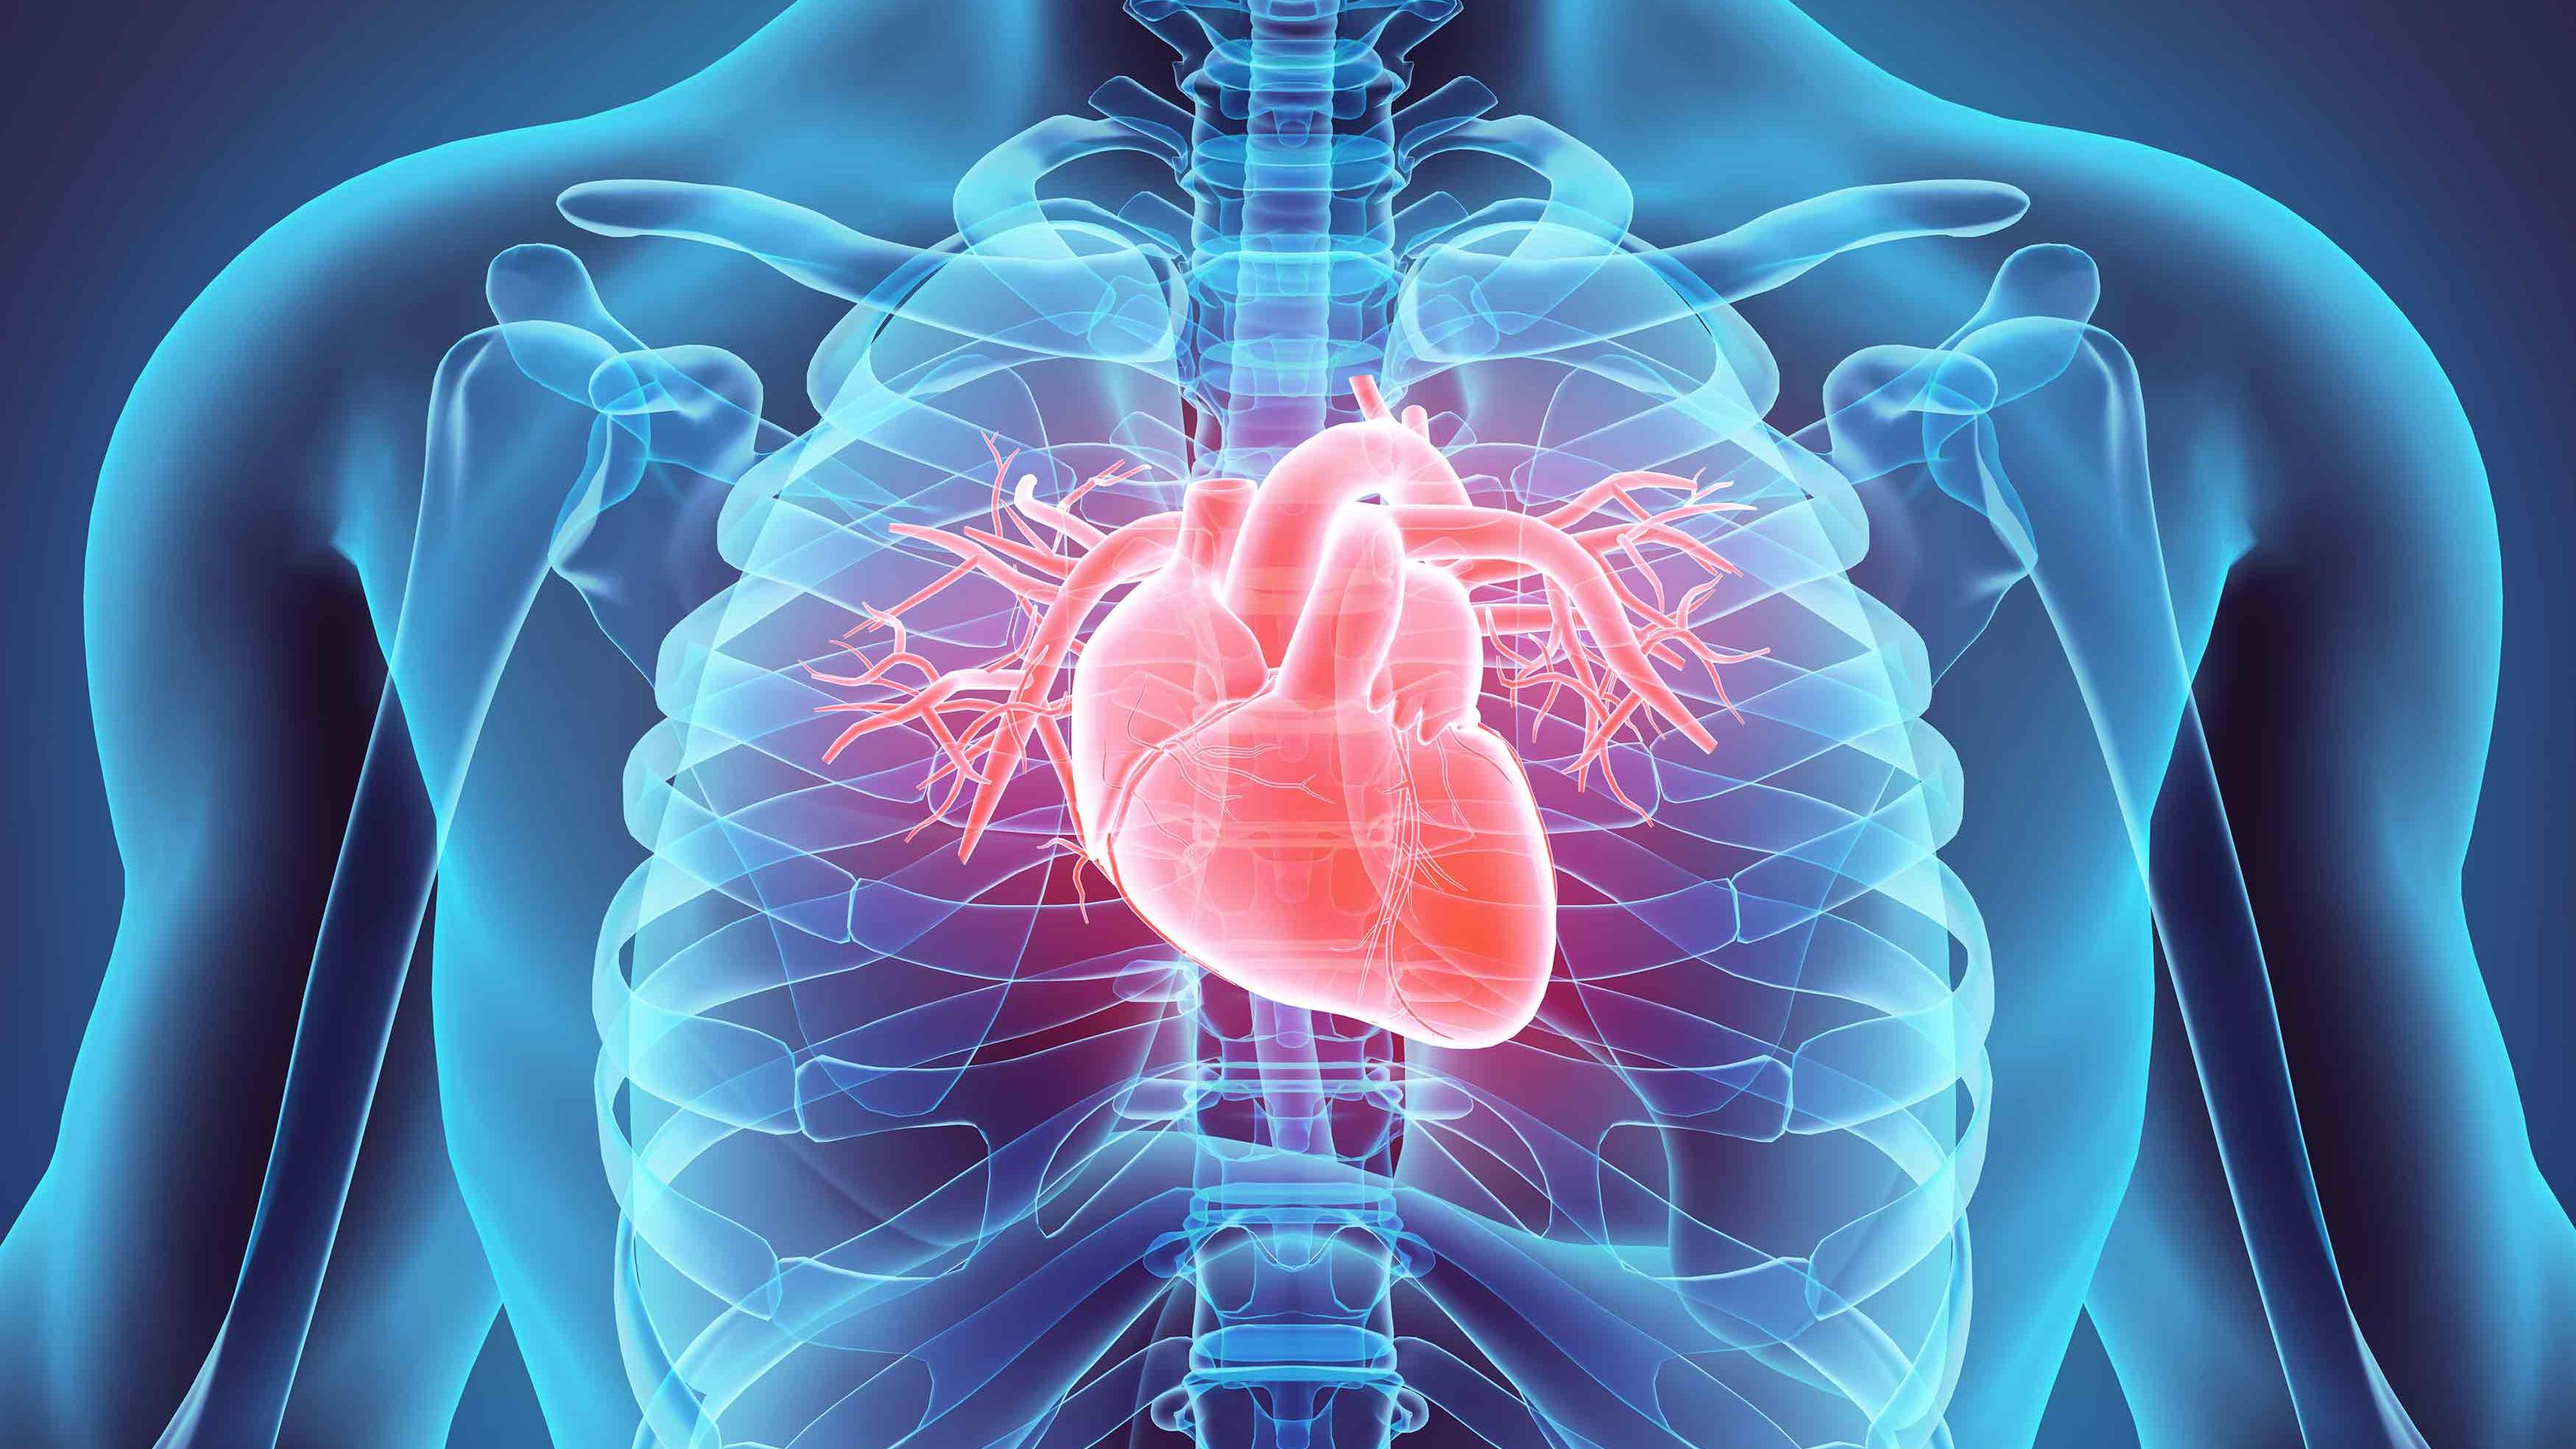
</div>

### Coleccion de datos clinicos de pacientes que presentan enfermedades cardiovasculares, contiene mediciones de diferentes parametros que estan relacionados con la enfermedad 

#### Features:

Age | Objective Feature | age | int (days) 

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Primeramente se importan los datos .csv  https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [1]:
import pandas as pd 
df = pd.read_csv("C:/Users/Alfredo/Documents/GitHub/RNP/cardio_train.csv",sep=';')

### Primera exploracion de lo datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### La columna id no proporciona informacion relevante

In [3]:
df = df.drop(['id'],axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#cols = ['smoke', 'alco','active','age','gender' ]

#df = df.drop(cols, axis=1)

### No hay datos nulos y el formato es correcto (numerico) para procesarlo en una red neuronal, no es necesario mas limpieza, graficamos la correlacion entre variables

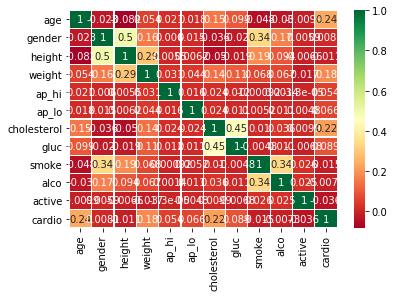

In [5]:
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

### no hay una correlacion fuerte entre dos variables distintas lo cual indica cada variable proporciona informacion relevante en una red neuronal

#### Se separan los datos en aquellos que son las variables de entrada (features) y la columna que proporciona la informacion de clasificacion (0 no enfermo, 1 enfermo)

In [6]:
X_df = df
X_df = X_df.drop(['cardio'], axis=1)
y_df = df['cardio']
X_df.shape

(70000, 11)

### Se separan los datos en 70% entrenamiento (train) y 30% prueba (test)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [len(y_tr),1])
y_ts = np.reshape(y_ts, [len(y_ts),1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(21000, 11)
(49000, 11)
(21000, 1)
(49000, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (49000, 11)
Testing Data : (21000, 11)


### La red funcional a usar inicialmente sera un perceptron multicapas con una capa oculta con la siguiente estructura, donde features son las columnas en nuestros datos de entrenamiento 
<div>
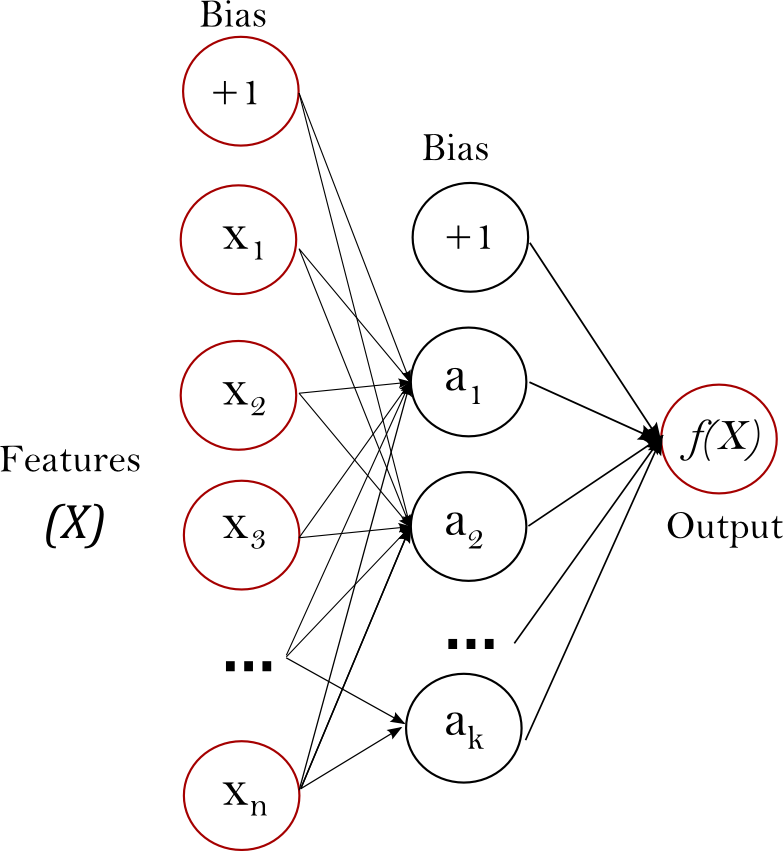
</div>

In [9]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorfl

1.14.0


C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alfredo\An

In [10]:
print("===========Data Summary===========")
print("Training Data :", x_tr.shape)
print("Testing Data :", y_tr.shape)


num_features = 11
num_hidden1 = 11
num_output = 1

## X almacena los datos de entrada (11 columnas), y almacena el valor esperado
X = tf.placeholder(tf.float32, [None,num_features])
Y = tf.placeholder(tf.float32, [None, num_output])

# pesos entre capa de entrada y capa oculta (20 nodos en la capa oculta)
W1 = tf.Variable(tf.random_normal([num_features,num_hidden1], seed=0), name='weight1')
b1 = tf.Variable(tf.random_normal([num_hidden1], seed=0), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

# hidden1
#W2 = tf.Variable(tf.random_normal([20,20], seed=0), name='weight2')
#b2 = tf.Variable(tf.random_normal([20], seed=0), name='bias2')
#layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)


# pesos entre capa oculta y de salida
W2 = tf.Variable(tf.random_normal([num_hidden1,num_output], seed=0), name='weight2')
b2 = tf.Variable(tf.random_normal([num_output], seed=0), name='bias2')
logits = tf.matmul(layer1,W2) + b2

# valor de salida de la red neuronal
hypothesis = tf.nn.sigmoid(logits)

# funcion de error 
# x = logits, z = labels     
# sigmoid_cross_entropy = x - x * z + log(1 + exp(-x))
cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

# entrenamiento por descenso de gradientes, factor de aprendizaje 0.01
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# definicion de accuracy, fraccion de aciertos de la red neuronal en una iteracion sobre los datos de entrenamiento
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

print("\n============Processing============")
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    cost_summary = tf.summary.scalar("error",cost)
    acc_summary = tf.summary.scalar("acc",accuracy)
    # Merge all summaries
    all_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("C:/Users/Alfredo/Documents/GitHub/RNP/tensorboard/mlp_cardio_tf", sess.graph)
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_tr, Y: y_tr})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_tr, Y: y_tr})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            summary_results = sess.run(all_summary,feed_dict={X: x_tr, Y: y_tr})
            writer.add_summary(summary_results,step)  
    
    train_acc = sess.run(accuracy, feed_dict={X: x_tr, Y: y_tr})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: x_ts, Y: y_ts})
        
    print("\n============Results============")
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

===========Data Summary===========
Training Data : (21000, 11)
Testing Data : (21000, 1)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

============Processing============
Step:     0	Loss: 2.368	Acc: 49.85%
Step:  1000	Loss: 0.646	Acc: 62.29%
Step:  2000	Loss: 0.639	Acc: 63.43%
Step:  3000	Loss: 0.636	Acc: 63.76%
Step:  4000	Loss: 0.635	Acc: 63.88%
Step:  5000	Loss: 0.634	Acc: 64.08%
Step:  6000	Loss: 0.633	Acc: 64.15%
Step:  7000	Loss: 0.632	Acc: 64.16%
Step:  8000	Loss: 0.632	Acc: 64.19%
Step:  9000	Loss: 0.631	Acc: 64.19%
Step: 10000	Loss: 0.631	Acc: 64.22%

============Results============
Model Prediction = 0.6422449
Test Prediction = 0.64061904
